In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# ***Betweenness Centrality***
--------------------

In [4]:
# This assumes that importance of nodes depends on them connecting other nodes.
# Distance between 2 nodes is the shortest path between them.

karate = nx.karate_club_graph()
karate = nx.convert_node_labels_to_integers(karate, first_label = 1)

In [11]:
list(nx.all_shortest_paths(karate, source = 34, target = 2))

[[34, 14, 2], [34, 20, 2], [34, 31, 2]]

In [12]:
# Note that nodes 14, 20 and 31 are in the shortest paths between nodes 34 and 2.

## ***Betweenness centrality***
# ***$C_{btw}(v) = \sum{_{s,t \in N}{\frac{\sigma_{s,t}{(v)}}{\sigma_{s,t}}}}$***

In [16]:
# Take two different nodes - s and t
# Find all the shortest paths between s and t -> sigma s,t
# Find all the shortest paths between s and t that contain node v -> sigma s,t (v)
# Betweenness centrality is the sum of this for all possible pairs of s and t in the network.

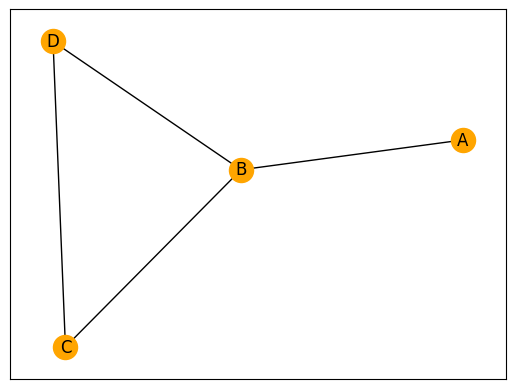

In [15]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D")])
nx.draw_networkx(graph, node_color = "orange")

# $C_{btw}(B) = \frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} + \frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} + \frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}}$

In [19]:
# This equation excludes the node B.

(1 / 1) + (1 / 1) + (0 / 1)

2.0

In [20]:
# If we include node B;

In [47]:
{tuple(sorted(pair)) for pair in itertools.permutations(["A", "B", "C", "D"], r = 2)}

{('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')}

In [52]:
template = r"\frac{\sigma_{%s, %s}{(B)}}{\sigma_{%s, %s}} +"

for (node_1, node_2) in {tuple(sorted(pair)) for pair in itertools.permutations(["A", "B", "C", "D"], r = 2)}:
    print(template % (node_1, node_2, node_1, node_2))

\frac{\sigma_{B, D}{(B)}}{\sigma_{B, D}} +
\frac{\sigma_{A, B}{(B)}}{\sigma_{A, B}} +
\frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} +
\frac{\sigma_{B, C}{(B)}}{\sigma_{B, C}} +
\frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
\frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}} +


# $C_{btw}(B) = \frac{\sigma_{B, D}{(B)}}{\sigma_{B, D}} +
\frac{\sigma_{A, B}{(B)}}{\sigma_{A, B}} +
\frac{\sigma_{A, D}{(B)}}{\sigma_{A, D}} +
\frac{\sigma_{B, C}{(B)}}{\sigma_{B, C}} +
\frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
\frac{\sigma_{C, D}{(B)}}{\sigma_{C, D}}$

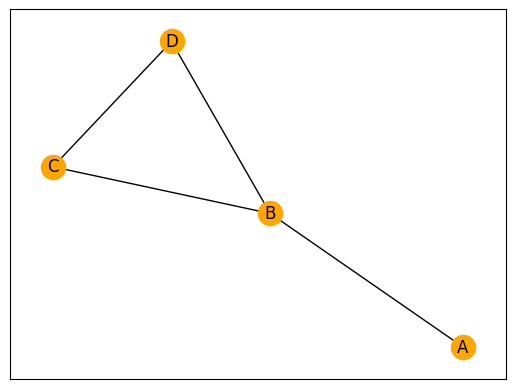

In [58]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "D")])
nx.draw_networkx(graph, node_color = "orange")

In [60]:
(1 / 1) + (1 / 1) + (1 / 1) + (1 / 1) + (1 / 1) + (0 / 1)

5.0

## ***Disconnected nodes***

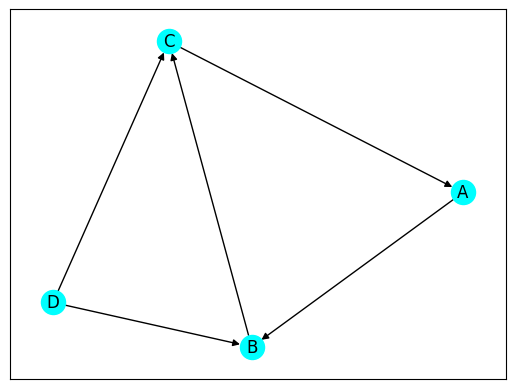

In [64]:
graph = nx.DiGraph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("D", "B"), ("D", "C"), ("C", "A")])
nx.draw_networkx(graph, node_color = "cyan")

In [65]:
# Here node D cannot be reached by any other nodes!
# Hence, sigma(any, D) will be 0.

# In betweenness centrality only the pair of nodes that has at least one shortest path between them are considered.

In [67]:
# Betweenness centrality of B, excluding B as a node

# $C_{btw}(B) = \frac{\sigma_{A, C}{(B)}}{\sigma_{A, C}} +
                \frac{\sigma_{D, C}{(B)}}{\sigma_{D, C}} +
                \frac{\sigma_{C, A}{(B)}}{\sigma_{C, A}} +
                \frac{\sigma_{D, A}{(B)}}{\sigma_{D, A}}$

In [74]:
(1 / 1) + (0 / 1) + (0 / 1) + (0 / 1)

1.0

# $C_{btw}(C) = \frac{\sigma_{A, B}{(C)}}{\sigma_{A, B}} +
                \frac{\sigma_{D, B}{(C)}}{\sigma_{D, B}} +
                \frac{\sigma_{B, A}{(C)}}{\sigma_{B, A}} +
                \frac{\sigma_{D, A}{(C)}}{\sigma_{D, A}}$

In [76]:
(0 / 1) + (0 / 1) + (1 / 1) + (1 / 1)

2.0

### ***We did not discuss betweenness centrality of directed networks where the given node is also included.***

### **Normalization**

In [78]:
# Betweenness centrality will be larger in graphs with many nodes simply because in larger networks there are many pairs of 
# s and  t to choose from.
# To normalize this betweenness centrality is divided by the number of pairs of nodes in the graph 
# (excluding the node bc is being calculated for)

## **Total number of node pairs in a directed graph = $\frac{1}{2}(|N| - 1)(|N| - 2)$**
## **Total number of node pairs in an undirected graph = ${(|N| - 1)(|N| - 2)}$**

In [79]:
nx.betweenness_centrality(karate, normalized = False, endpoints = False)

{1: 231.0714285714286,
 2: 28.478571428571424,
 3: 75.85079365079366,
 4: 6.288095238095237,
 5: 0.3333333333333333,
 6: 15.833333333333334,
 7: 15.833333333333332,
 8: 0.0,
 9: 29.529365079365082,
 10: 0.44761904761904764,
 11: 0.3333333333333333,
 12: 0.0,
 13: 0.0,
 14: 24.215873015873015,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 17.1468253968254,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 9.299999999999999,
 25: 1.1666666666666665,
 26: 2.0277777777777777,
 27: 0.0,
 28: 11.79206349206349,
 29: 0.9476190476190476,
 30: 1.5428571428571427,
 31: 7.609523809523807,
 32: 73.00952380952378,
 33: 76.69047619047619,
 34: 160.5515873015873}

In [99]:
bckarate = nx.betweenness_centrality(karate, normalized = False, endpoints = False)
sorted(bckarate.items(), reverse = True, key = lambda item: item[1])

[(1, 231.0714285714286),
 (34, 160.5515873015873),
 (33, 76.69047619047619),
 (3, 75.85079365079366),
 (32, 73.00952380952378),
 (9, 29.529365079365082),
 (2, 28.478571428571424),
 (14, 24.215873015873015),
 (20, 17.1468253968254),
 (6, 15.833333333333334),
 (7, 15.833333333333332),
 (28, 11.79206349206349),
 (24, 9.299999999999999),
 (31, 7.609523809523807),
 (4, 6.288095238095237),
 (26, 2.0277777777777777),
 (30, 1.5428571428571427),
 (25, 1.1666666666666665),
 (29, 0.9476190476190476),
 (10, 0.44761904761904764),
 (5, 0.3333333333333333),
 (11, 0.3333333333333333),
 (8, 0.0),
 (12, 0.0),
 (13, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (27, 0.0)]

In [100]:
import operator

In [102]:
sorted(nx.betweenness_centrality(karate, normalized = False, endpoints = False).items(), reverse = True, key = operator.itemgetter(1))

[(1, 231.0714285714286),
 (34, 160.5515873015873),
 (33, 76.69047619047619),
 (3, 75.85079365079366),
 (32, 73.00952380952378),
 (9, 29.529365079365082),
 (2, 28.478571428571424),
 (14, 24.215873015873015),
 (20, 17.1468253968254),
 (6, 15.833333333333334),
 (7, 15.833333333333332),
 (28, 11.79206349206349),
 (24, 9.299999999999999),
 (31, 7.609523809523807),
 (4, 6.288095238095237),
 (26, 2.0277777777777777),
 (30, 1.5428571428571427),
 (25, 1.1666666666666665),
 (29, 0.9476190476190476),
 (10, 0.44761904761904764),
 (5, 0.3333333333333333),
 (11, 0.3333333333333333),
 (8, 0.0),
 (12, 0.0),
 (13, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (27, 0.0)]

In [80]:
karate.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34))

In [86]:
{tuple(sorted(pair)) for pair in itertools.permutations(karate.nodes(), r = 2)};

In [93]:
occurrance_in_spaths = {node: 0 for node in karate.nodes()}
knodes = karate.nodes()

# Inclusive :(
for (s, t) in {tuple(sorted(pair)) for pair in itertools.permutations(karate.nodes(), r = 2)}:
    for node in knodes:
        shortest_paths = nx.all_shortest_paths(karate, source = s, target = t)
        if shortest_paths:
            for spath in shortest_paths:
                if node in spath:
                    occurrance_in_spaths[node] += 1

In [94]:
occurrance_in_spaths

{1: 931,
 2: 205,
 3: 300,
 4: 76,
 5: 90,
 6: 174,
 7: 174,
 8: 71,
 9: 264,
 10: 49,
 11: 90,
 12: 88,
 13: 114,
 14: 209,
 15: 131,
 16: 131,
 17: 170,
 18: 140,
 19: 131,
 20: 178,
 21: 131,
 22: 140,
 23: 131,
 24: 186,
 25: 70,
 26: 85,
 27: 101,
 28: 92,
 29: 60,
 30: 135,
 31: 115,
 32: 343,
 33: 446,
 34: 723}

## ***Betweenness centrality can be really computationally intensive, particularly for large networks.***

In [104]:
# So one can sample a subset of nodes to compute the bc
# Sample size = 10

nx.betweenness_centrality(karate, normalized = False, endpoints = False, k = 10)

{1: 240.63230158730158,
 2: 31.09380952380952,
 3: 97.98206349206347,
 4: 2.880555555555556,
 5: 0.0,
 6: 6.8,
 7: 9.633333333333333,
 8: 0.0,
 9: 27.630396825396826,
 10: 0.0,
 11: 1.1333333333333333,
 12: 0.0,
 13: 0.0,
 14: 15.559047619047618,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 13.48126984126984,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 20.513333333333332,
 25: 2.833333333333333,
 26: 0.49111111111111105,
 27: 0.0,
 28: 4.004444444444443,
 29: 0.2833333333333333,
 30: 1.4166666666666665,
 31: 6.775714285714286,
 32: 85.80817460317459,
 33: 63.577301587301584,
 34: 174.9704761904762}